# Implementing SVM for Handwritten Digit Classification

### 1. Importing Libraries:

In [1]:
# Data Manipulation Libraries:
import numpy as np
import pandas as pd
# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling Libraries:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### 2. Load the Data:

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print("Data Description:\n",digits['DESCR'])

Data Description:
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. T

In [5]:
X, y = digits.data, digits.target

### 3. EDA:

#### 3.1 Visualize Samples:

Labels:
 [0 1 2 3 4 5 6 7 8 9]


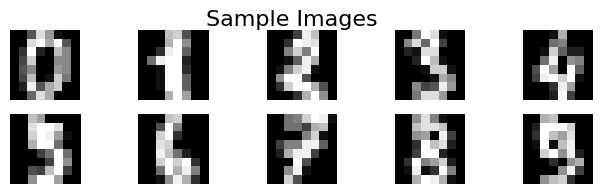

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(8, 2))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')
plt.suptitle("Sample Images", fontsize=16)
print("Labels:\n", y[:10])
plt.show()

#### 3.2 Class distribution:

C:\Users\AY7\AppData\Local\Temp\ipykernel_17216\403160280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


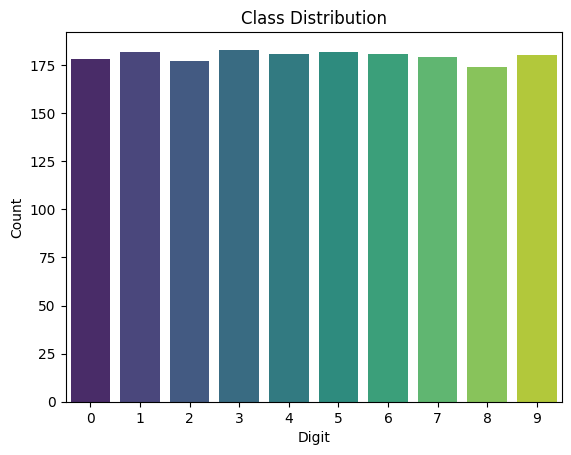

In [7]:
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

Digit classes are balanced.

#### 3.3 Split into training and testing sets:

In [8]:
indexes = np.arange(len(y))  # Create an array of original indexes

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
train_idx, test_idx = train_test_split(indexes, stratify=y, test_size=0.2, random_state=42)


#### 3.4 Feature scaling:

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. SVM Model Development and Training

#### 4.1 Train:

In [11]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # Kernels to test
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'gamma': ['scale', 'auto'],          # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                  # Degree for 'poly' kernel
}


In [12]:
svm = SVC()

In [13]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [14]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy', verbose=2)

In [15]:
# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9874709639953542


#### 4.2 Evaluate the best model on the test data:

In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [17]:
print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred))

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      1.00      0.99        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 5. Result Analysis:

In [18]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix:')

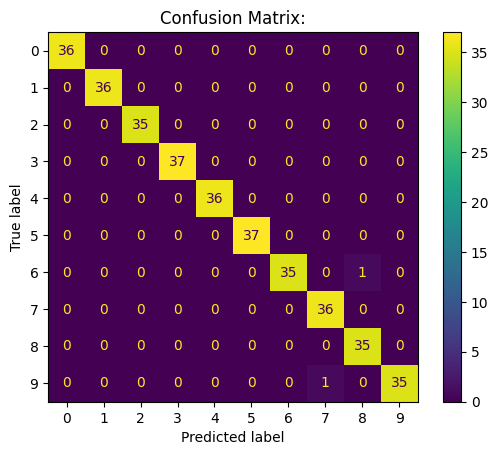

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()
disp.ax_.set_title(f"Confusion Matrix:")

In [20]:
# Get the indexes of misclassified rows
misclassified_indices = np.where(y_test != y_pred)[0]

In [21]:
misclassified_original_indices = test_idx[misclassified_indices]

In [22]:
for idx in misclassified_indices:
    print(f"Index: {idx}, True Label: {y_test[idx]}, Predicted Label: {y_pred[idx]}")

Index: 36, True Label: 6, Predicted Label: 8
Index: 93, True Label: 9, Predicted Label: 7


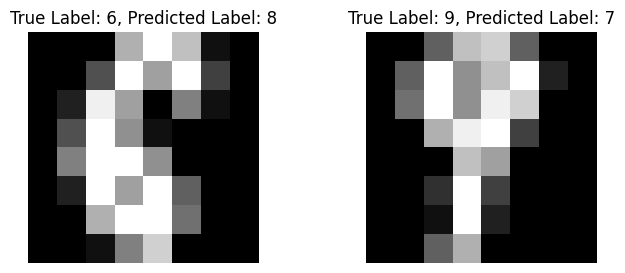

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[misclassified_original_indices[i]], cmap='gray')
    ax.set_title(f"True Label: {y_test[misclassified_indices[i]]}, Predicted Label: {y_pred[misclassified_indices[i]]}")
    ax.axis('off')
    
# plt.suptitle("Sample Images", fontsize=16)
# print("Labels:\n", y[:10])
plt.show()

- The upper corner of six is more curved, So maybe because that it confused classifing it as 8.
- The down part of 9 is more straight with the original 9 curve,  So maybe because that it confused classifing it as 7.